In [52]:
import pickle
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import math

In [38]:
from itertools import combinations
mypath = 'Meshes/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(len(onlyfiles))
len(list(combinations(onlyfiles,2)))


306


46665

# Loading neuron properties and edgelist

In [39]:
region_of_interest = 'mALT(L)_'
dictionaries = ['areas','bounding_boxes','neuron_maximum_distances','neuron_mean_distances','neuron_median_distances','neuron_minimum_distances','times_distances','volumes']
infile = open('mALT(L)_areas.pkl','rb')
areas = pickle.load(infile)
infile = open('mALT(L)_volumes.pkl','rb')
volumes = pickle.load(infile)
infile = open('mALT(L)_times_distances.pkl','rb')
times_distances = pickle.load(infile)
infile = open('mALT(L)_bounding_boxes.pkl','rb')
bounding_boxes = pickle.load(infile)
infile = open('mALT(L)_neuron_maximum_distances.pkl','rb')
neuron_maximum_distances = pickle.load(infile)
infile = open('mALT(L)_neuron_mean_distances.pkl','rb')
neuron_mean_distances = pickle.load(infile)
infile = open('mALT(L)_neuron_median_distances.pkl','rb')
neuron_median_distances = pickle.load(infile)
infile = open('mALT(L)_neuron_minimum_distances.pkl','rb')
neuron_minimum_distances = pickle.load(infile)

In [40]:
edge_list = pd.read_csv('edge_list_mALT(L)')
edge_list

,bodyId_pre,bodyId_post,roi,weight
0,204962969,297713859,SMP(L),1
1,204962969,328373131,SMP(L),8
2,204962969,419803353,NotPrimary,1
3,204962969,419807685,SMP(L),1
4,204962969,543615199,NotPrimary,1
...,...,...,...,...
1974,5813130061,663298610,NotPrimary,1
1975,5901206628,359066834,NotPrimary,1
1976,5901206628,5813046674,NotPrimary,1
1977,5901206628,5813068453,SMP(L),1


# Other properties, region, neuron type etc.

In [41]:
weighted_edge_list = []
bodyId_pre_weights = {}
bodyId_post_weights = {}
for index,row in edge_list.iterrows():
    edge = (row[0],row[1],row[3])
    weighted_edge_list.append(edge)
    bodyId_pre_weights[row[0]] = row[3]
    bodyId_post_weights[row[1]] = row[3]
    

307


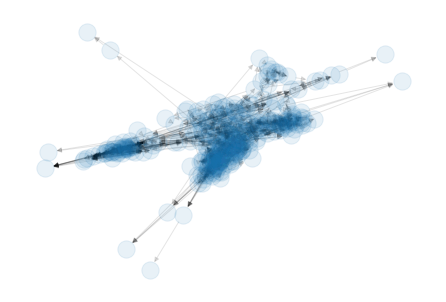

In [42]:
G = nx.DiGraph()
G.add_weighted_edges_from(weighted_edge_list)
print(len(G.nodes()))
nx.draw(G,alpha = 0.1)

# 1. Connetcome properties


In [43]:
in_degrees = [val for (node, val) in G.in_degree()]
out_degrees = [val for (node, val) in G.out_degree()]
in_degree_dict = dict(G.in_degree())
out_degree_dict = dict(G.out_degree())

(0.0, 45.0)

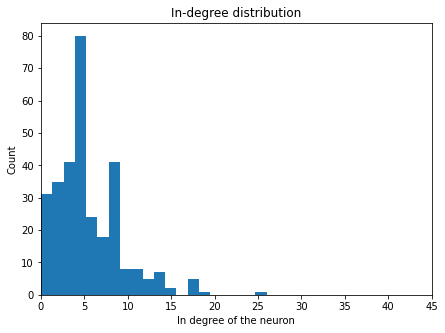

In [44]:
plt.figure(figsize = (7,5))
plt.hist(in_degrees,bins = 20)
plt.title("In-degree distribution")
plt.ylabel('Count')
plt.xlabel('In degree of the neuron')
plt.xlim(0,45)

(0.0, 45.0)

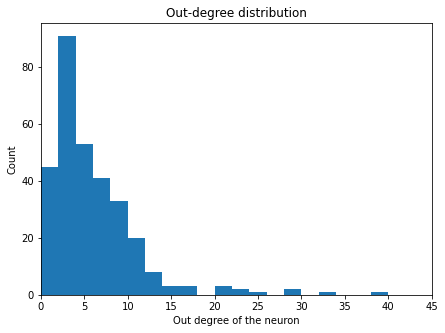

In [45]:
plt.figure(figsize = (7,5))
plt.title('Out-degree distribution')
plt.hist(out_degrees,bins = 20)
plt.ylabel('Count')
plt.xlabel('Out degree of the neuron')
plt.xlim(0,45)

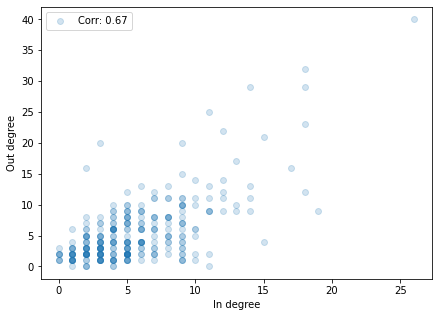

In [46]:
plt.figure(figsize = (7,5))
plt.scatter(in_degrees,out_degrees,alpha = 0.2,label = 'Corr: ' + str(np.round(np.corrcoef(in_degrees,out_degrees)[1][0],2)))
plt.xlabel('In degree')
plt.ylabel('Out degree')
plt.legend()

# 2. Physical properties

## 2.1 Number of segments (to be linear length)

## 2.2 Contraction factor

Segments/Segments if they were laid out in a line (or diagonal or something, larget distance from start to finish)

## 2.3 Area

Text(0.5, 0, 'Volume ( 512 nm^3)')

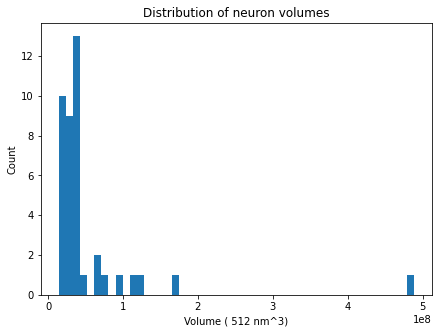

In [17]:
plt.figure(figsize = (7,5))
plt.hist(areas.values(),bins = 50)
plt.title('Distribution of neuron volumes')
plt.ylabel('Count')
plt.xlabel('Volume ( 512 nm^3)')

## 2.4 Volumes

Text(0.5, 0, 'Volume ( 512 nm^3)')

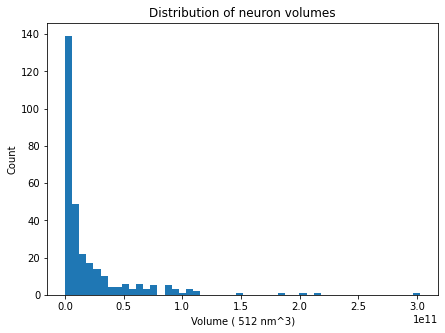

In [15]:
plt.figure(figsize = (7,5))
plt.hist(volumes.values(),bins = 50)
plt.title('Distribution of neuron volumes')
plt.ylabel('Count')
plt.xlabel('Volume ( 512 nm^3)')

## 2.5 Scaling laws


In [ ]:
volumes_list =
plt.figure(figsize = (7,5))
plt.scatter(volumes.values(),areas.values(),alpha = 0.2,label = 'Corr: ' + str(np.round(np.corrcoef(in_degrees,out_degrees)[1][0],2)))
plt.xlabel('Volumes')
plt.ylabel('Areas')
plt.legend()

# 3. Proxy physical network descriptors

## 3.0 Bounding boxes

In [78]:
body_id_lengths = {}
bounding_box_contraction_factor = {}
body_id_l_ratio = {}
bounding_box_areas = {}
bounding_box_volumes = {}
bounding_box_diagonals = {}
for bodyid in bounding_boxes.keys():
    l_x = bounding_boxes[bodyid][1] -  bounding_boxes[bodyid][0]
    l_y = bounding_boxes[bodyid][3] -  bounding_boxes[bodyid][2]
    l_z = bounding_boxes[bodyid][5] -  bounding_boxes[bodyid][4]
    length_list = [l_x,l_y,l_z]
    body_id_lengths[bodyid] = length_list
    
    l_min_max = (max(length_list) - min(length_list))/max(length_list) 
    
    bounding_box_contraction_factor[bodyid] = l_min_max 
    bounding_box_diagonals[bodyid] = math.sqrt(l_x**2+l_y**2+l_z**2)
    bounding_box_areas[bodyid] = 2*l_x*l_y + 2*l_x*l_z + 2*l_y*l_z
    bounding_box_volumes[bodyid] = l_x * l_y * l_z

## 3.1 Bounding box diagonals

Text(0.5, 0, 'Length of the diagonal of the bounding box (8 nm)')

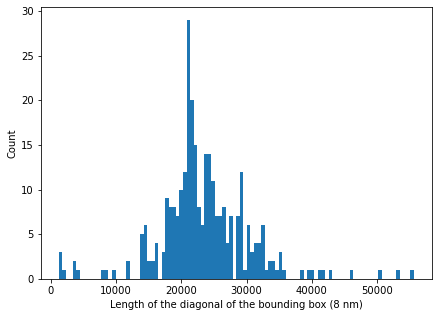

In [71]:
plt.figure(figsize = (7,5))
plt.hist(bounding_box_diagonals.values(),bins = 100)
plt.ylabel('Count')
plt.xlabel('Length of the diagonal of the bounding box (8 nm)')

## 3.2 Bounding box contraction factor

In [74]:
length_list = [500,500,500]
l_min_max = (max(length_list) - min(length_list))/max(length_list) 
print(length_list)
print(l_min_max )

[500, 500, 500]
0.0


(0.0, 1.0)

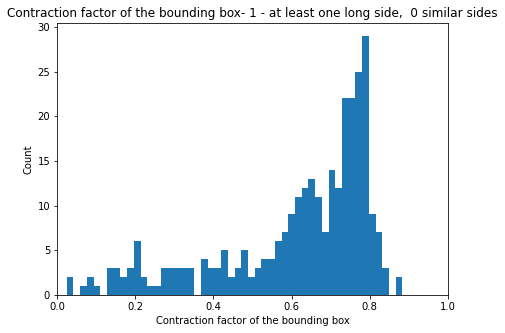

In [73]:
plt.figure(figsize = (7,5))
plt.hist(body_id_l_min_max.values(),bins = 50)
plt.title('Contraction factor of the bounding box- 1 - at least one long side,  0 similar sides')
plt.ylabel('Count')
plt.xlabel('Contraction factor of the bounding box')
plt.xlim(0,1)

## 3.3 Bounding box areas

Text(0.5, 0, 'Bounding box volume')

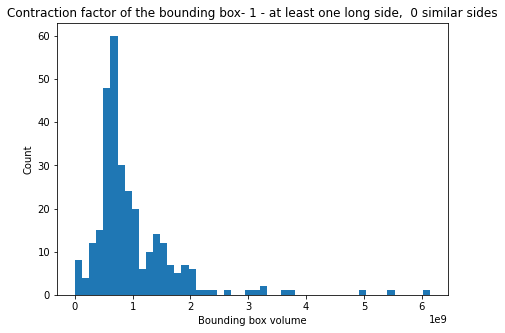

In [63]:
plt.figure(figsize = (7,5))
plt.hist(bounding_box_areas.values(),bins = 50)
plt.title('Contraction factor of the bounding box- 1 - at least one long side,  0 similar sides')
plt.ylabel('Count')
plt.xlabel('Bounding box volume')

## 3.4 Bounding box volume

Text(0.5, 0, 'Bounding Box Area')

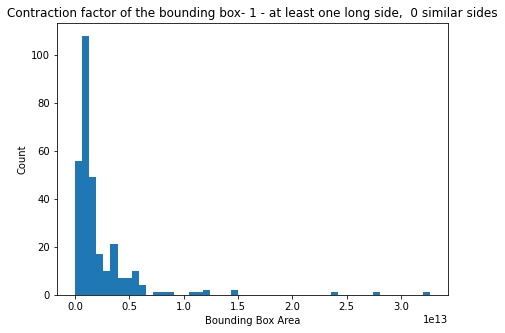

In [62]:
plt.figure(figsize = (7,5))
plt.hist(bounding_box_volumes.values(),bins = 50)
plt.title('Contraction factor of the bounding box- 1 - at least one long side,  0 similar sides')
plt.ylabel('Count')
plt.xlabel('Bounding box volume')

## 3.5 Bounding box descriptors relations


### 3.5.1 Diagonal

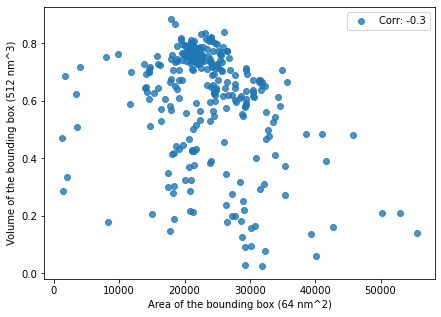

In [79]:
x = [bounding_box_diagonals[str(node)] for node in bounding_box_areas.keys()]
y = [bounding_box_contraction_factor[str(node)] for node in bounding_box_volumes.keys()]
plt.figure(figsize = (7,5))
plt.xlabel('Area of the bounding box (64 nm^2)')
plt.ylabel('Volume of the bounding box (512 nm^3)')
plt.scatter(x,y,alpha = 0.8,label = 'Corr: ' + str(np.round(np.corrcoef(x,y)[1][0],2)))
plt.legend()

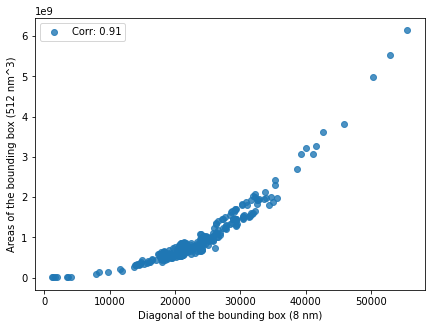

In [88]:
x = [bounding_box_diagonals[str(node)] for node in bounding_box_areas.keys()]
y = [bounding_box_areas[str(node)] for node in bounding_box_volumes.keys()]
plt.figure(figsize = (7,5))
plt.xlabel('Diagonal of the bounding box (8 nm)')
plt.ylabel('Areas of the bounding box (512 nm^3)')
plt.scatter(x,y,alpha = 0.8,label = 'Corr: ' + str(np.round(np.corrcoef(x,y)[1][0],2)))
plt.legend()

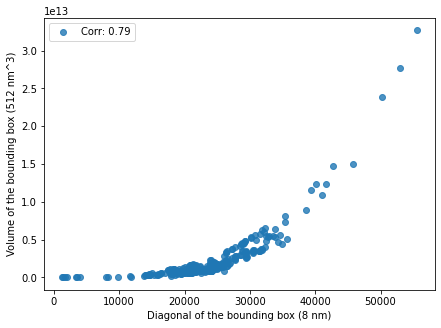

In [90]:
x = [bounding_box_diagonals[str(node)] for node in bounding_box_areas.keys()]
y = [bounding_box_volumes[str(node)] for node in bounding_box_volumes.keys()]
plt.figure(figsize = (7,5))
plt.xlabel('Diagonal of the bounding box (8 nm)')
plt.ylabel('Volume of the bounding box (512 nm^3)')
plt.scatter(x,y,alpha = 0.8,label = 'Corr: ' + str(np.round(np.corrcoef(x,y)[1][0],2)))
plt.legend()

### 3.5.2 Areas

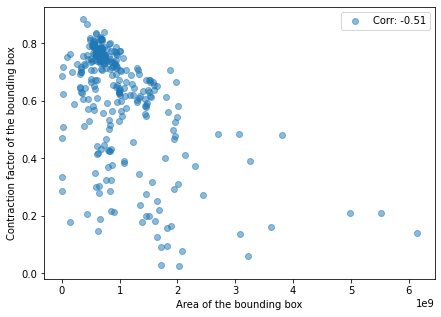

In [84]:
x = [bounding_box_areas[str(node)] for node in bounding_box_areas.keys()]
y = [bounding_box_contraction_factor[str(node)] for node in bounding_box_volumes.keys()]
plt.figure(figsize = (7,5))
plt.xlabel('Area of the bounding box' )
plt.ylabel('Contraction factor of the bounding box')
plt.scatter(x,y,alpha = 0.5,label = 'Corr: ' + str(np.round(np.corrcoef(x,y)[1][0],2)))
plt.legend()

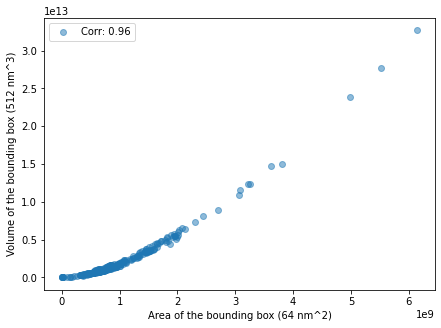

In [66]:
x = [bounding_box_areas[str(node)] for node in bounding_box_areas.keys()]
y = [bounding_box_volumes[str(node)] for node in bounding_box_volumes.keys()]
plt.figure(figsize = (7,5))
plt.xlabel('Area of the bounding box (64 nm^2)')
plt.ylabel('Volume of the bounding box (512 nm^3)')
plt.scatter(x,y,alpha = 0.5,label = 'Corr: ' + str(np.round(np.corrcoef(x,y)[1][0],2)))
plt.legend()

### 3.5.3 Volumes

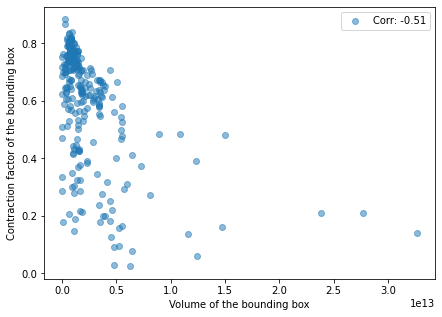

In [86]:
x = [bounding_box_volumes[str(node)] for node in bounding_box_areas.keys()]
y = [bounding_box_contraction_factor[str(node)] for node in bounding_box_volumes.keys()]
plt.figure(figsize = (7,5))
plt.xlabel('Volume of the bounding box' )
plt.ylabel('Contraction factor of the bounding box')
plt.scatter(x,y,alpha = 0.5,label = 'Corr: ' + str(np.round(np.corrcoef(x,y)[1][0],2)))
plt.legend()

# 4 Comparison of real and proxy physical network descriptors
The question of this part is how much does the detail of the structure matter, compared to it's bounding box. Is rough shape and size enough?


In [ ]:
x = [bounding_box_areas[str(node)] for node in areas.keys()]
y = [areas[str(node)] for node in areas.keys()]
plt.figure(figsize = (7,5))
plt.xlabel('Volume of the bounding box' )
plt.ylabel('Contraction factor of the bounding box')
plt.scatter(x,y,alpha = 0.5,label = 'Corr: ' + str(np.round(np.corrcoef(x,y)[1][0],2)))
plt.legend()

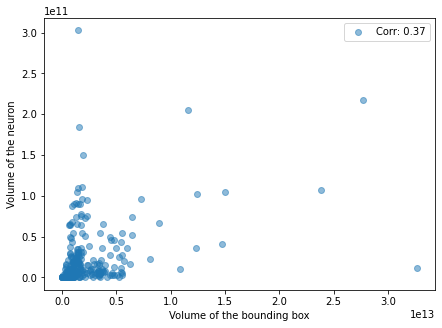

In [94]:
x = [bounding_box_volumes[str(node)] for node in bounding_box_areas.keys()]
y = [volumes[str(node)] for node in bounding_box_volumes.keys()]
plt.figure(figsize = (7,5))
plt.xlabel('Volume of the bounding box' )
plt.ylabel('Volume of the neuron')
plt.scatter(x,y,alpha = 0.5,label = 'Corr: ' + str(np.round(np.corrcoef(x,y)[1][0],2)))
plt.legend()

In [93]:
x = [bounding_box_areas[str(node)] for node in areas.keys()]
y = [areas[str(node)] for node in areas.keys()]
plt.figure(figsize = (7,5))
plt.xlabel('Volume of the bounding box' )
plt.ylabel('Contraction factor of the bounding box')
plt.scatter(x,y,alpha = 0.5,label = 'Corr: ' + str(np.round(np.corrcoef(x,y)[1][0],2)))
plt.legend()

KeyError: '203598557'

# 5 Relations between different network properties and physical network descriptors

The question of this part is how much does the detail of the structure matter, compared to it's bounding box. Is rough shape and size enough?


In [53]:
x = [body_id_l_min_max[str(node)] for node in G.nodes()]
y = [val for (node, val) in G.in_degree()]

plt.figure(figsize = (7,5))
plt.xlabel('Contraction factor of the bounding box')
plt.ylabel('In degree of the neuron')
plt.scatter(x,y,alpha = 0.8,label = 'Corr: ' + str(np.round(np.corrcoef(x,y)[1][0],2)))
plt.legend()
x = [body_id_l_min_max[str(node)] for node in G.nodes()]
y = [val for (node, val) in G.out_degree()]
plt.figure(figsize = (7,5))
plt.xlabel('Contraction factor of the bounding box')
plt.ylabel('Out degree of the neuron')
plt.scatter(x,y,alpha = 0.8,label = 'Corr: ' + str(np.round(np.corrcoef(x,y)[1][0],2)))
plt.legend()

KeyError: '204962969'

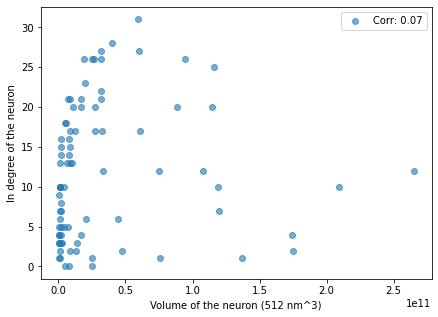

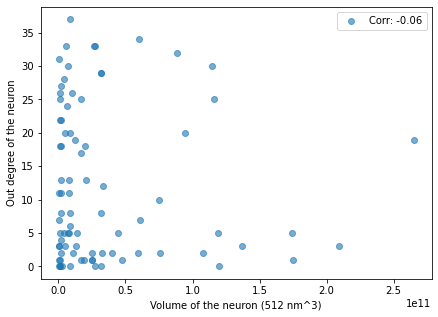

In [30]:
x = [body_id_volumes[str(node)] for node in G.nodes()]
y = [val for (node, val) in G.in_degree()]
plt.figure(figsize = (7,5))
plt.xlabel('Volume of the neuron (512 nm^3)')
plt.ylabel('In degree of the neuron')
plt.scatter(x,y,alpha = 0.6,label = 'Corr: ' + str(np.round(np.corrcoef(x,y)[1][0],2)))
plt.legend()
plt.figure(figsize = (7,5))

x = [body_id_volumes[str(node)] for node in G.nodes()]
y = [val for (node, val) in G.out_degree()]
plt.xlabel('Volume of the neuron (512 nm^3)')
plt.ylabel('Out degree of the neuron')
plt.scatter(x,y,alpha = 0.6,label = 'Corr: ' + str(np.round(np.corrcoef(x,y)[1][0],2)))
plt.legend()

# Derived measures - volumetric density, surface density,linear density

No handles with labels found to put in legend.


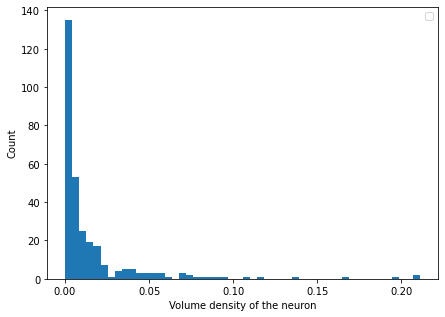

In [97]:

volume_density = [volumes[str(node)]/bounding_box_volumes[(str(node))] for node in bounding_box_volumes.keys()]
plt.figure(figsize = (7,5))
plt.xlabel('Volume density of the neuron' )
plt.ylabel('Count')
plt.hist(volume_density,bins = 50)
plt.legend()

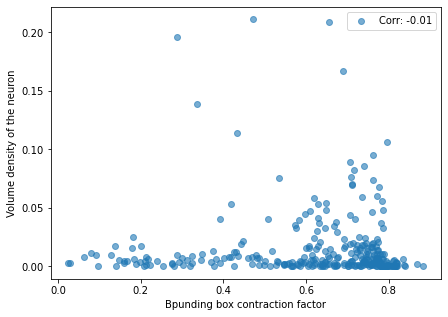

In [99]:
x = [bounding_box_contraction_factor[str(node)] for node in bounding_box_volumes.keys()]

y = [volumes[str(node)]/bounding_box_volumes[(str(node))] for node in bounding_box_volumes.keys()]
plt.figure(figsize = (7,5))
plt.ylabel('Volume density of the neuron' )
plt.xlabel('Bpunding box contraction factor')
plt.scatter(x,y,alpha = 0.6,label = 'Corr: ' + str(np.round(np.corrcoef(x,y)[1][0],2)))
plt.legend()